<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#test-data" data-toc-modified-id="test-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>test data</a></span></li><li><span><a href="#ResMiCo" data-toc-modified-id="ResMiCo-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>ResMiCo</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Zoom" data-toc-modified-id="Zoom-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>Zoom</a></span></li></ul></li></ul></li><li><span><a href="#UHGG" data-toc-modified-id="UHGG-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>UHGG</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#all-WIG" data-toc-modified-id="all-WIG-6.0.1"><span class="toc-item-num">6.0.1&nbsp;&nbsp;</span>all WIG</a></span></li></ul></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Testing gvis

# Init

In [3]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(tidytable)
library(LeyLabRMisc)
Init()

In [151]:
library(Gviz)
library(Rsamtools)

# test data

In [5]:
library(GenomicRanges)
data(cpgIslands)
class(cpgIslands)

[1] "GRanges"
attr(,"package")
[1] "GenomicRanges"

In [6]:
chr <- as.character(unique(seqnames(cpgIslands)))
gen <- genome(cpgIslands)
atrack <- AnnotationTrack(cpgIslands, name = "CpG")

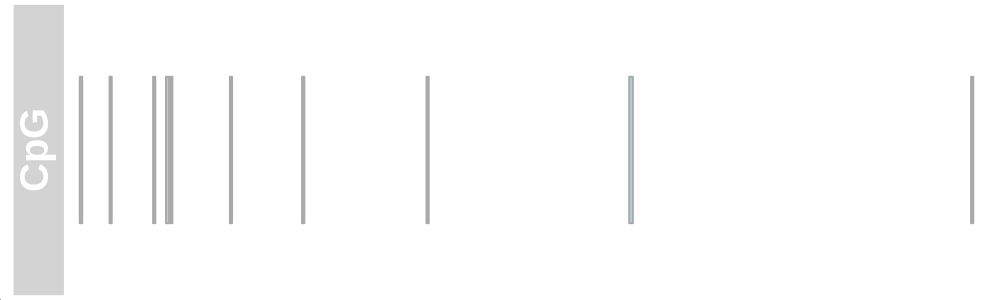

In [7]:
p.dims(5,1.5)
plotTracks(atrack)

In [8]:
gtrack <- GenomeAxisTrack()

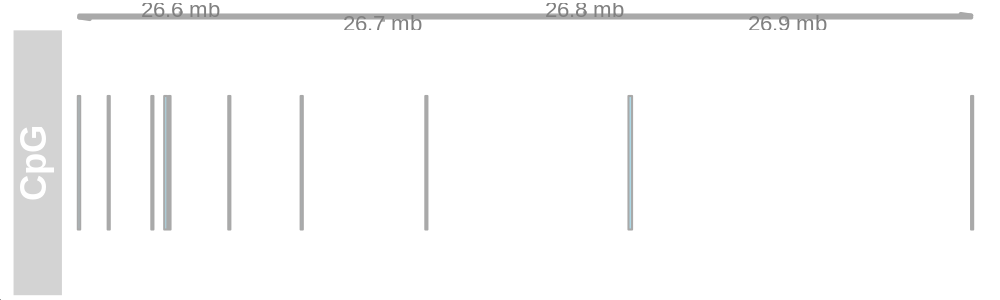

In [9]:
plotTracks(list(gtrack, atrack))

In [10]:
itrack <- IdeogramTrack(genome = gen, chromosome = chr)

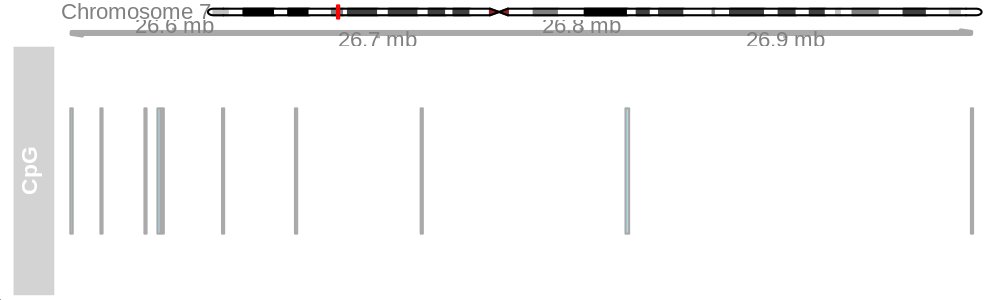

In [11]:
plotTracks(list(itrack, gtrack, atrack))

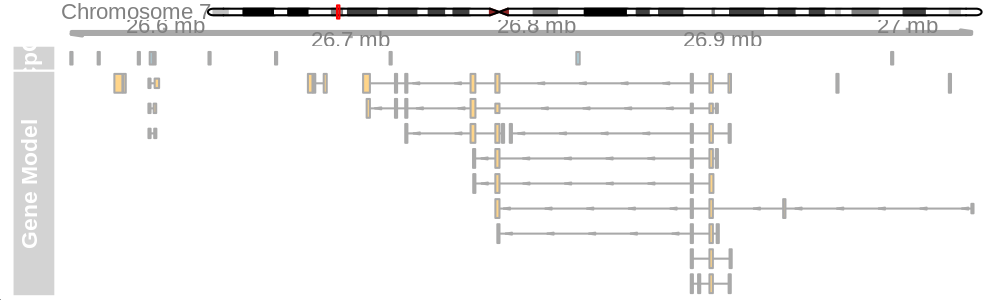

In [12]:
data(geneModels)
grtrack <- GeneRegionTrack(geneModels, genome = gen,
                           chromosome = chr, name = "Gene Model")
plotTracks(list(itrack, gtrack, atrack, grtrack))

In [13]:
bgFile <- system.file("extdata/test.bedGraph", package = "Gviz")
dTrack2 <- DataTrack(range = bgFile, genome = "hg19", type = "l", 
                     chromosome = "chr19", name = "bedGraph")
dTrack2

DataTrack 'bedGraph'
| genome: hg19
| active chromosome: chr19
| positions: 9
| samples:1
| strand: * 

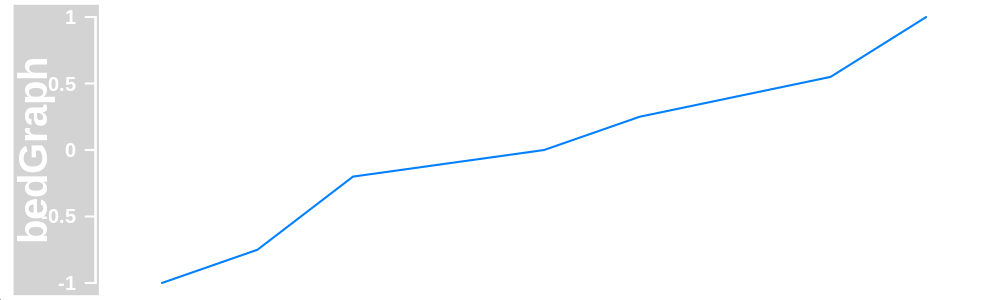

In [14]:
plotTracks(dTrack2)

# ResMiCo

In [ ]:
options(ucscChromosomeNames=FALSE)

In [113]:
base_dir = '/ebio/abt3_projects/DeepMAsED/version2/deepmased/ResMiCo-SM/tmp/ERS396506'
base_dir = file.path(base_dir, 'map/ERS396506/ERS396506_contigs/NA/NA/NA/NA')

contigs_file = file.path(base_dir, 'contigs.fasta')
bam_file = file.path(base_dir, 'mapped.bam')
wig_file = file.path(base_dir, 'rmc_scores.wig')

In [170]:
target_contigs = c(
  'contig_37771_CONTIG37772',
  'contig_37895_CONTIG37896', 
  'contig_37896_CONTIG37897', 
  'contig_37915_CONTIG37916',
  'contig_32550_CONTIG32551'
)
target_contigs %>% length

[1] 5

In [174]:
# getting contig lengths
contigs = FaFile(contigs_file) %>% seqinfo %>% as.data.frame
contigs$contig = rownames(contigs)
contigs = contigs %>% as.data.table %>%
    rename.('length_bp' = seqlengths) %>%
    select.(contig, length_bp) %>%
    filter.(contig %in% target_contigs)
contigs

contig,length_bp
<chr>,<int>
contig_32550_CONTIG32551,1218
contig_37771_CONTIG37772,1196
⋮,⋮
contig_37896_CONTIG37897,1180
contig_37915_CONTIG37916,1177


In [175]:
# tracks
tracks = list(
    SequenceTrack(contigs_file),
    AlignmentsTrack(bam_file, isPaired = TRUE),
    DataTrack(wig_file, chromosome = contig, type='l', name='ResMiCo')
)

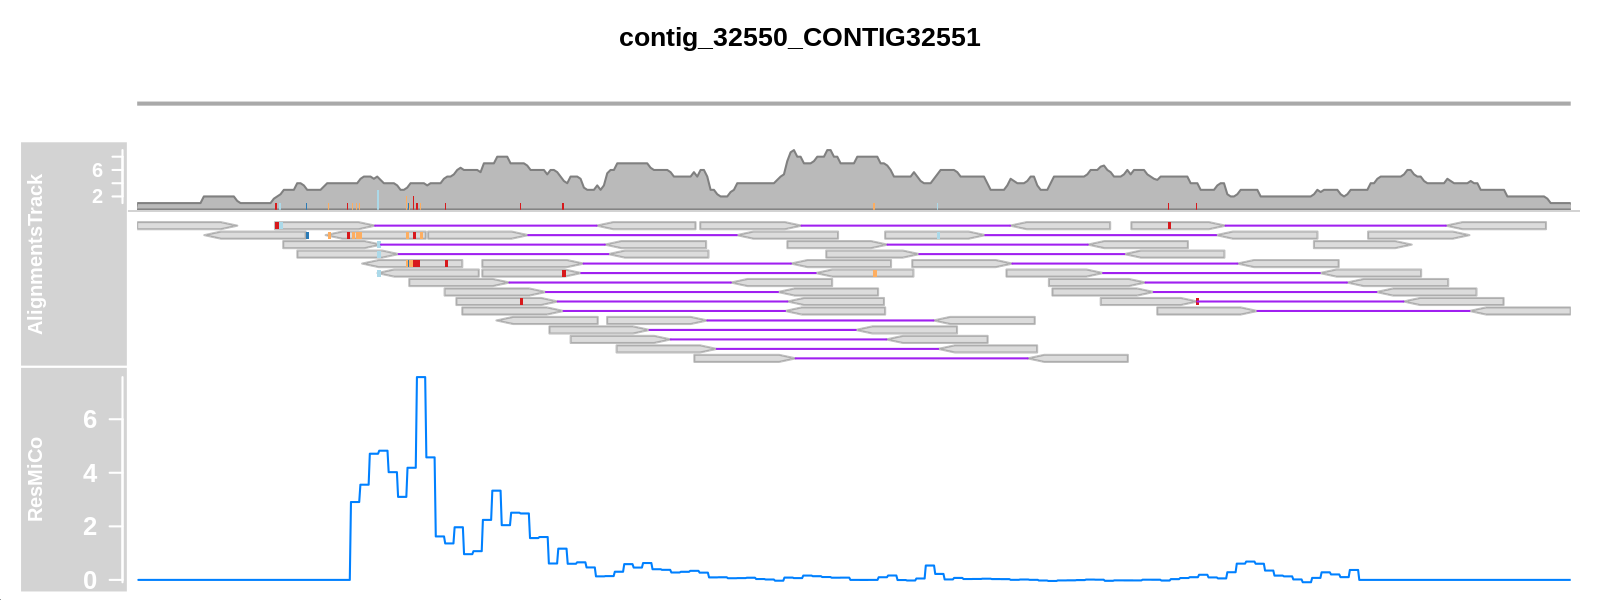

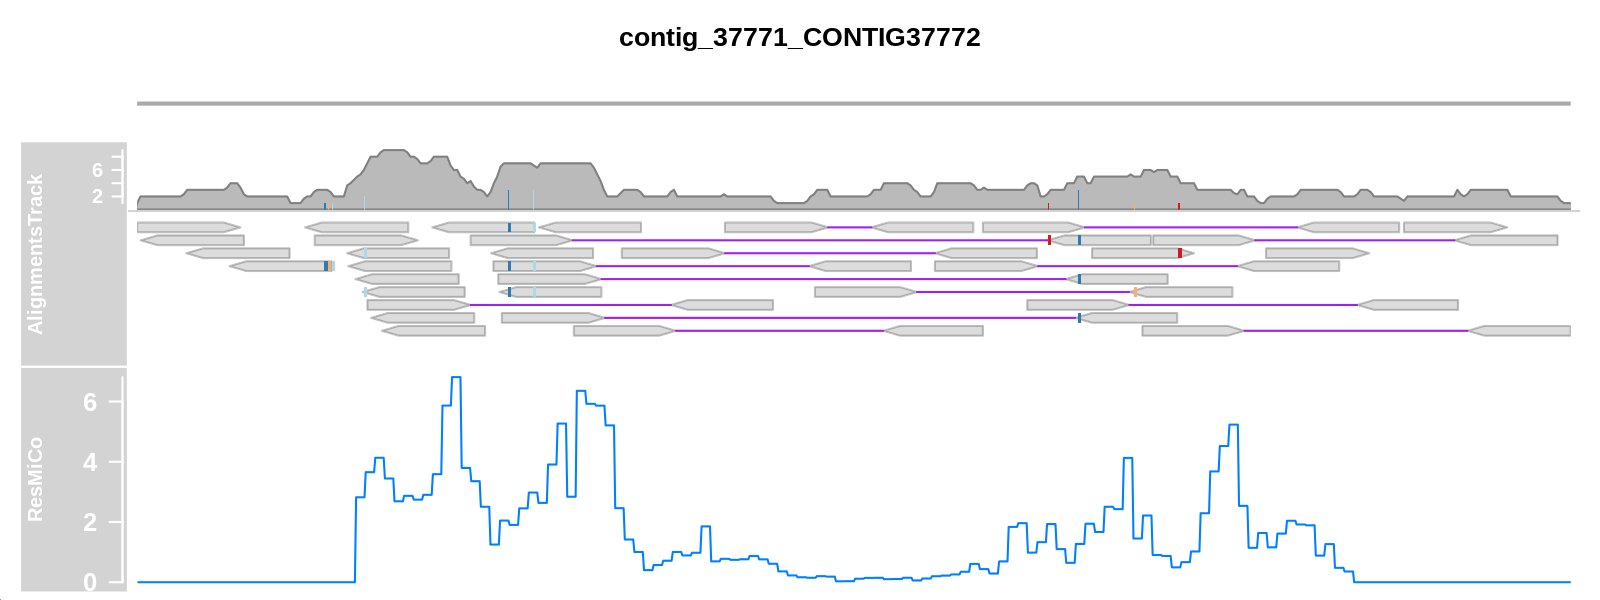

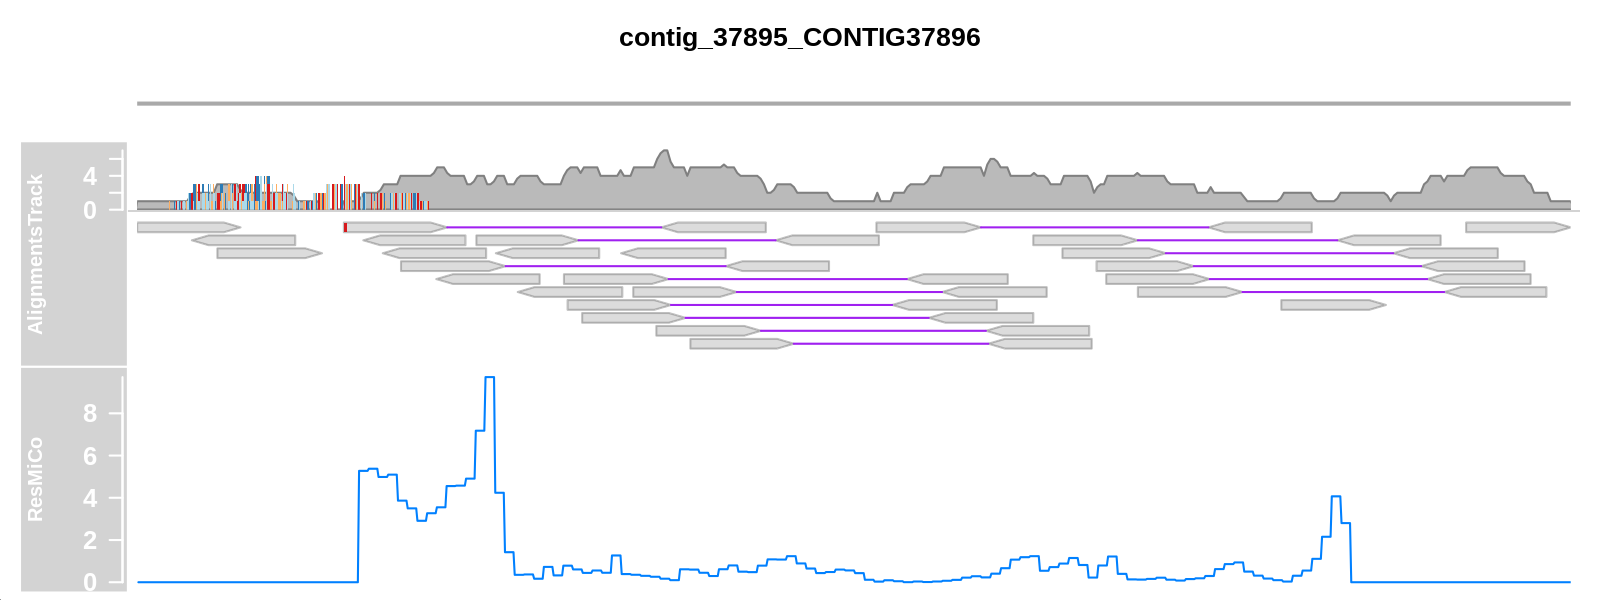

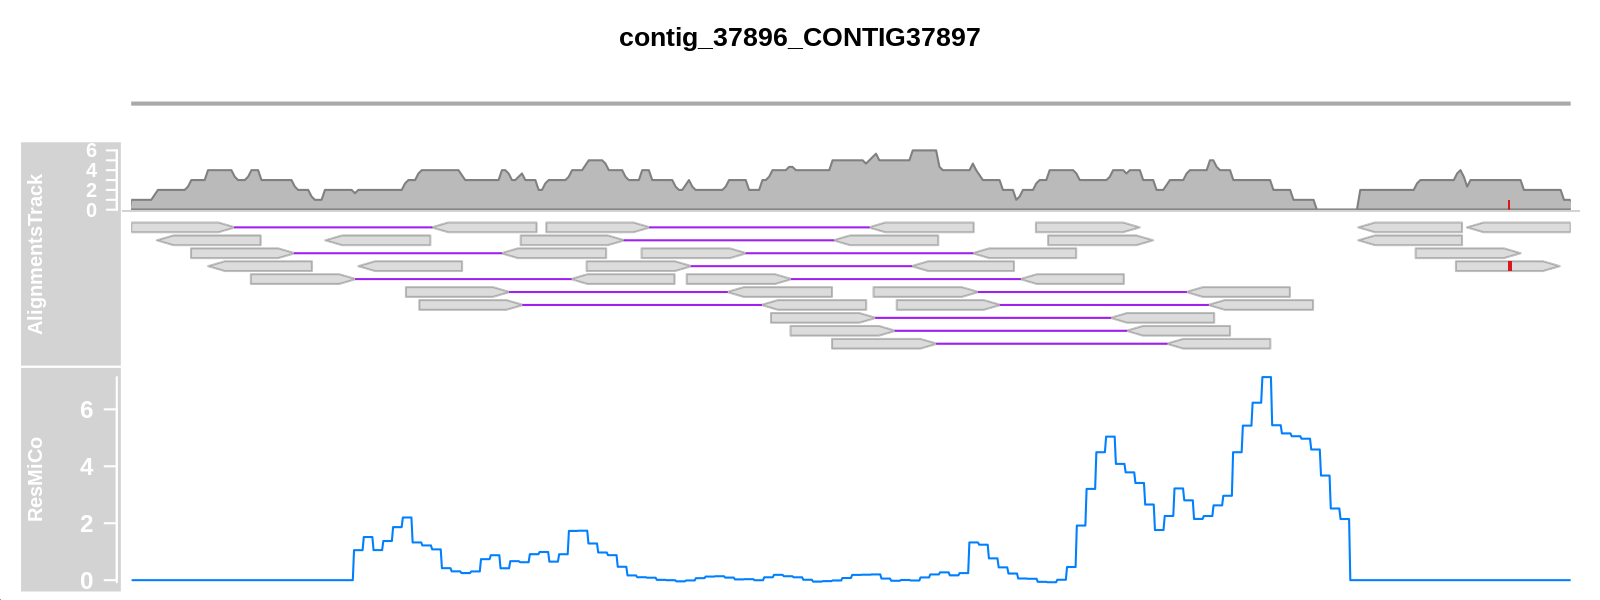

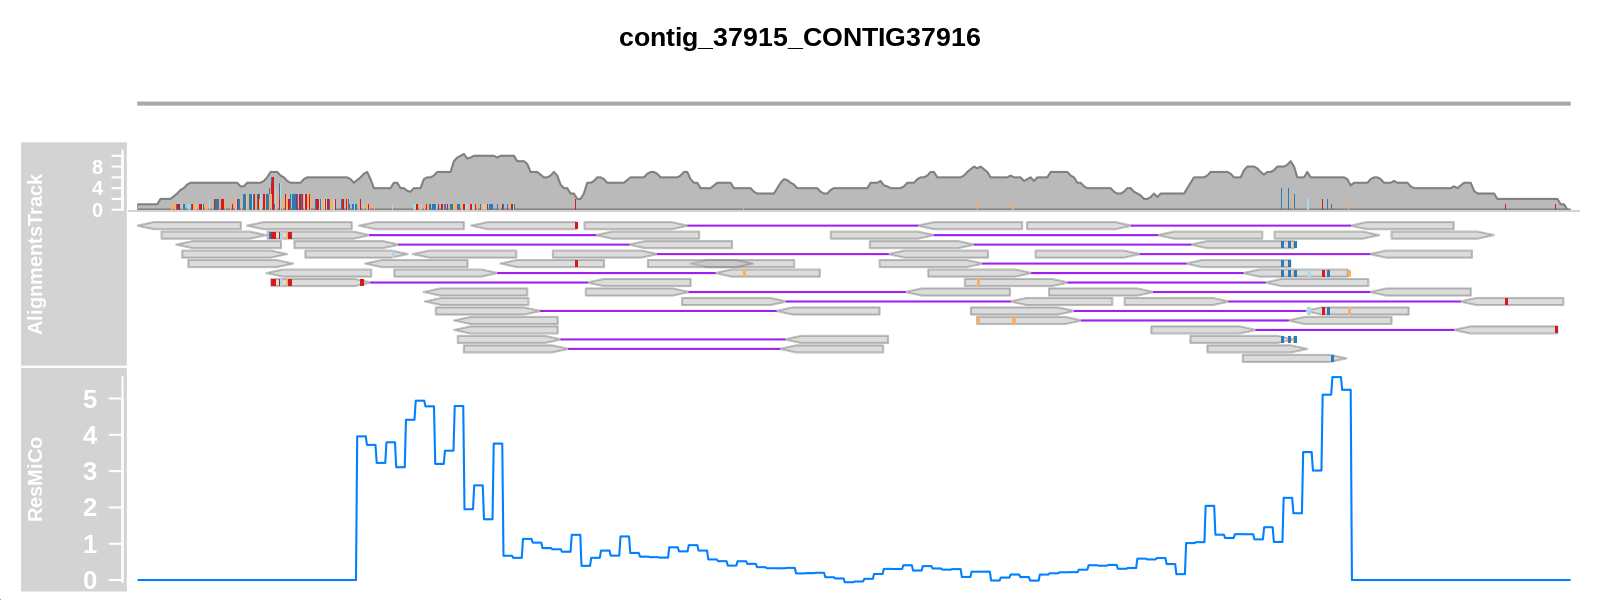

In [186]:
# plotting all contigs
plot_region = function(x, tracks){
    plotTracks(tracks, 
               sizes = c(1,3,3),
               from = 1, to = x[['length_bp']], 
               chromosome = x[['contig']], 
               col.mates = 'purple',
               main = x[['contig']],
               cex.main = 0.8,
               cex = 0.8)
}
p.dims(8,3)
ret = contigs %>%
    group_split.(contig) %>%
    lapply(plot_region, tracks=tracks)

### Zoom

In [130]:
# tracks
tracks = list(
    AlignmentsTrack(bam_file, isPaired = TRUE),
    SequenceTrack(contigs_file)
    #DataTrack(wig_file, chromosome = contig, type='l', name='ResMiCo')
)

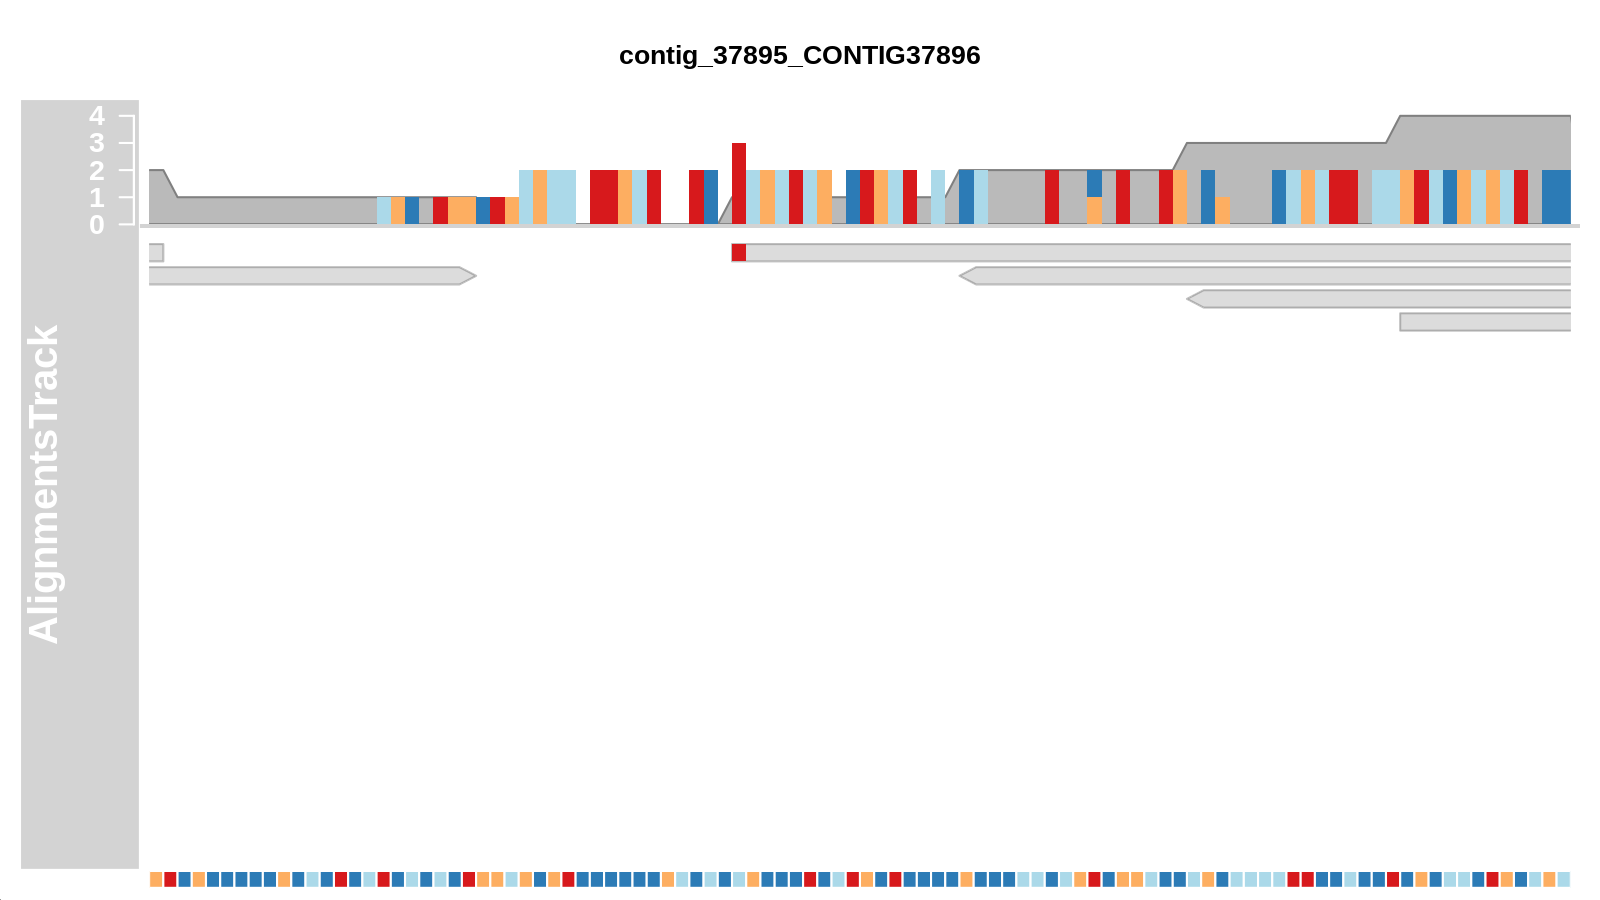

In [144]:
contig = 'contig_37895_CONTIG37896'
p.dims(8,4.5)
plotTracks(tracks,
            from = 130, to = 230, 
            chromosome = contig, 
            col.mates = 'purple',
            main = contig,
            cex.main = 0.8,
            cex = 0.8)

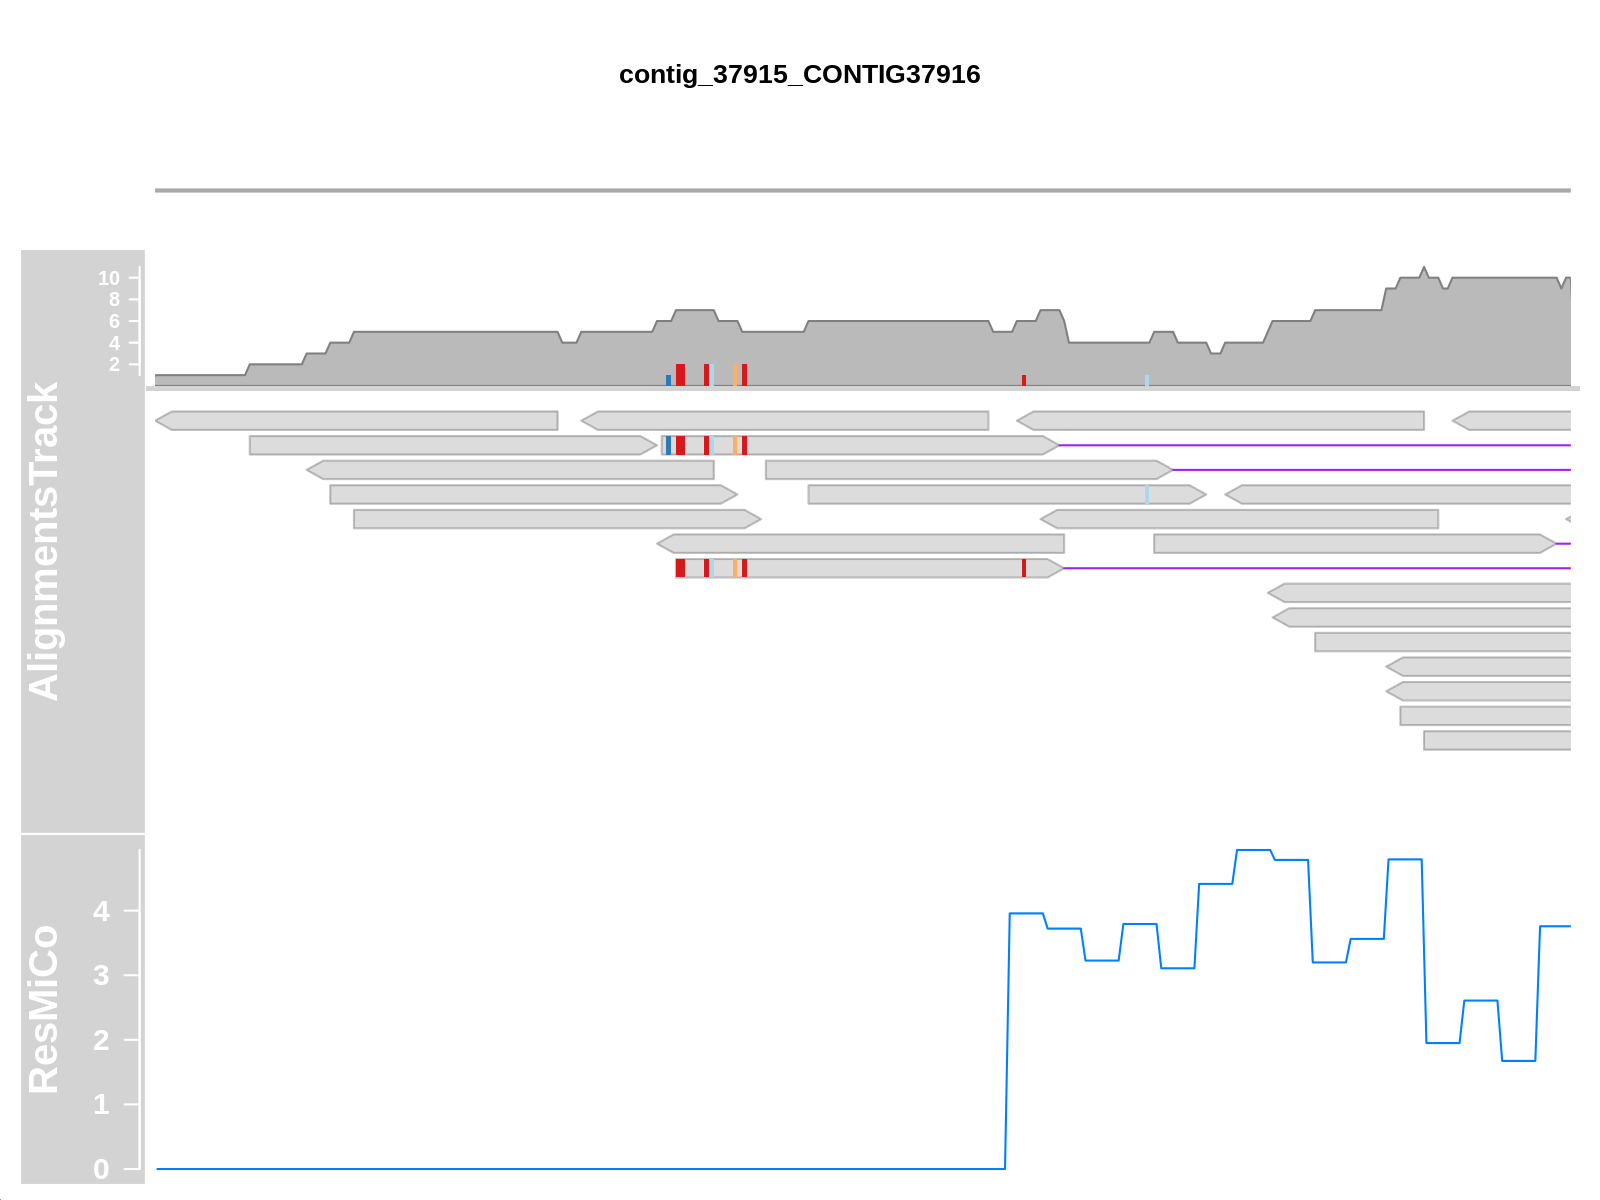

In [121]:
contig = 'contig_37915_CONTIG37916'
p.dims(8,6)
plotTracks(tracks, 
            sizes = c(1,5,3),
            from = 1, to = 300, 
            chromosome = contig, 
            col.mates = 'purple',
            main = contig,
            cex.main = 0.8,
            cex = 0.8)

# UHGG

In [221]:
base_dir = '/ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG/LLMGQC_r100/LLMGA/rmc-sm/map/'
scores_dir = '/ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG/LLMGQC_r100/resmico_scores/'



In [222]:
sample = 'ERS1069689'
scores_file = glue::glue('all_feat_contr_{s}.wig', s=sample)
D = file.path(base_dir, sample, glue::glue('{s}_contigs', s=sample), 'NA', 'NA', 'NA', 'NA')
contigs_file = file.path(D, 'contigs.fasta')
bam_file = file.path(D, 'mapped.bam')
wig_file = file.path(scores_dir, scores_file)

In [223]:
# getting target contigs
target_contigs = Fread(wig_file, sep=' ', header=FALSE) %>%
    filter.(V1 == 'variableStep') %>%
    mutate.(V2 = gsub('^chrom=', '', V2)) %>%
    .$V2
target_contigs %>% length
target_contigs %>% head(n=3)

[1] 1

[1] "contig_23541_CONTIG23542"

In [224]:
# getting contig lengths
contigs = FaFile(contigs_file) %>% seqinfo %>% as.data.frame
contigs$contig = rownames(contigs)
contigs = contigs %>% as.data.table %>%
    rename.('length_bp' = seqlengths) %>%
    select.(contig, length_bp) %>%
    filter.(contig %in% target_contigs)
contigs

contig,length_bp
<chr>,<int>
contig_23541_CONTIG23542,1329


In [225]:
# tracks
tracks = list(
    SequenceTrack(contigs_file),
    AlignmentsTrack(bam_file, isPaired = TRUE),
    DataTrack(wig_file, chromosome = contig, type='l', name='ResMiCo')
)

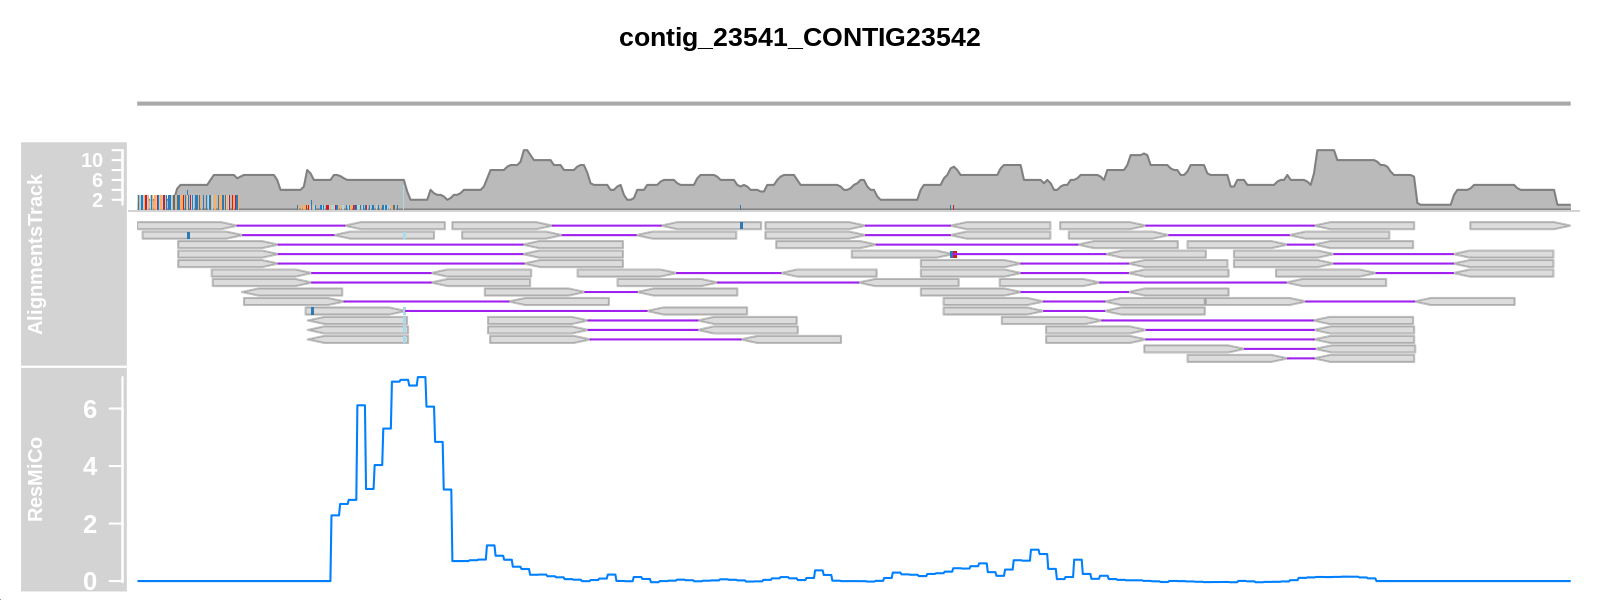

In [226]:
# plotting all contigs
plot_region = function(x, tracks){
    plotTracks(tracks, 
               sizes = c(1,3,3),
               from = 1, to = x[['length_bp']], 
               chromosome = x[['contig']], 
               col.mates = 'purple',
               main = x[['contig']],
               cex.main = 0.8,
               cex = 0.8)
}
p.dims(8,3)
ret = contigs %>%
    group_split.(contig) %>%
    lapply(plot_region, tracks=tracks)

### all WIG

In [ ]:
base_dir = '/ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG/LLMGQC_r100/LLMGA/rmc-sm/map/'
scores_dir = '/ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG/LLMGQC_r100/resmico_scores/'


In [248]:
score_files_9feat = list(
'ERS436684' = '9_feat_contr_ERS436684.wig',
'ERS537292' = '9_feat_contr_ERS537292.wig',
'ERS971961' = '9_feat_contr_ERS971961.wig',
'ERS1069689' = '9_feat_contr_ERS1069689.wig',
'SRS476211' = '9_feat_contr_SRS476211.wig',
'SRS820603' = '9_feat_contr_SRS820603.wig'
)
score_files_contr = list(
'ERS537292' = 'all_feat_contr_ERS537292.wig',
'ERS971961' = 'all_feat_contr_ERS971961.wig',
'ERS1069689' = 'all_feat_contr_ERS1069689.wig',
'SRS476114' = 'all_feat_contr_SRS476114.wig',
'SRS476211' = 'all_feat_contr_SRS476211.wig',
'SRS820603' = 'all_feat_contr_SRS820603.wig'
)
score_files_low = list(
'ERS235630' = 'all_feat_low_ERS235630.wig',
'ERS396506' = 'all_feat_low_ERS396506.wig',
'ERS1015611' = 'all_feat_low_ERS1015611.wig',
'SRS1858592' = 'all_feat_low_SRS1858592.wig',
'SRS1876707' = 'all_feat_low_SRS1876707.wig'
)
score_files_medium = list(
'ERS235591' = 'all_feat_medium_ERS235591.wig',
'ERS396506' = 'all_feat_medium_ERS396506.wig',
'ERS848736' = 'all_feat_medium_ERS848736.wig',
'ERS1015876' = 'all_feat_medium_ERS1015876.wig',
'SRS476114' = 'all_feat_medium_SRS476114.wig'
)

In [264]:
plot_region = function(x, tracks, out_dir=NULL){
    if(! is.null(out_dir)){
        if(! dir.exists(out_dir)){
            make_dir(out_dir)
        }
        out_file = file.path(out_dir, paste0(x[['contig']], '.png'))
        png(file=out_file, width=800, height=350)
    }
    plotTracks(tracks, 
               sizes = c(1,3,3),
               from = 1, to = x[['length_bp']], 
               chromosome = x[['contig']], 
               col.mates = 'purple',
               main = x[['contig']],
               cex.main = 0.8,
               cex = 0.8)
    if(! is.null(out_dir)){
        dev.off()
    }
}

plot_contig = function(sample, score_files, base_dir, scores_dir, out_dir=NULL){
    # input
    scores_file = glue::glue('all_feat_contr_{s}.wig', s=sample)
    D = file.path(base_dir, sample, glue::glue('{s}_contigs', s=sample), 'NA', 'NA', 'NA', 'NA')
    contigs_file = file.path(D, 'contigs.fasta')
    bam_file = file.path(D, 'mapped.bam')
    wig_file = file.path(scores_dir, score_files[[sample]])
    # getting target contigs
    target_contigs = Fread(wig_file, sep=' ', header=FALSE) %>%
        filter.(V1 == 'variableStep') %>%
        mutate.(V2 = gsub('^chrom=', '', V2)) %>%
        .$V2
    # getting contig lengths
    contigs = FaFile(contigs_file) %>% seqinfo %>% as.data.frame
    contigs$contig = rownames(contigs)
    contigs = contigs %>% as.data.table %>%
        rename.('length_bp' = seqlengths) %>%
        select.(contig, length_bp) %>%
        filter.(contig %in% target_contigs)
    # tracks
    tracks = list(
        SequenceTrack(contigs_file),
        AlignmentsTrack(bam_file, isPaired = TRUE),
        DataTrack(wig_file, chromosome = contig, type='l', name='ResMiCo')
    )
    # plotting
    contigs %>%
        group_split.(contig) %>%
        lapply(plot_region, tracks=tracks, out_dir=out_dir)
}

In [271]:
p.dims(8,3)
out_dir = file.path(scores_dir, '9_feat_contr')
ret = score_files_9feat %>% names %>% 
    lapply(plot_contig, score_files=score_files, base_dir=base_dir, 
           scores_dir=scores_dir, out_dir=out_dir)

In [272]:
p.dims(8,3)
out_dir = file.path(scores_dir, 'all_feat_contr')
ret = score_files_contr %>% names %>% 
    lapply(plot_contig, score_files=score_files, base_dir=base_dir, 
           scores_dir=scores_dir, out_dir=out_dir)

Created directory: /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG/LLMGQC_r100/resmico_scores//all_feat_contr 


In [273]:
p.dims(8,3)
out_dir = file.path(scores_dir, 'all_feat_low')
ret = score_files_low %>% names %>% 
    lapply(plot_contig, score_files=score_files, base_dir=base_dir, 
           scores_dir=scores_dir, out_dir=out_dir)

Created directory: /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG/LLMGQC_r100/resmico_scores//all_feat_low 


In [274]:
p.dims(8,3)
out_dir = file.path(scores_dir, 'all_feat_medium')
ret = score_files_medium %>% names %>% 
    lapply(plot_contig, score_files=score_files, base_dir=base_dir, 
           scores_dir=scores_dir, out_dir=out_dir)

Created directory: /ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG/LLMGQC_r100/resmico_scores//all_feat_medium 


# sessionInfo

In [10]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 18.04.6 LTS

Matrix products: default
BLAS/LAPACK: /tmp/global2/nyoungblut/code/DeepMAsED/conda_envs/dm-genome/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
[1] Gviz_1.38.0          GenomicRanges_1.46.0 GenomeInfoDb_1.30.0 
[4] IRanges_2.28.0       S4Vectors_0.32.0     BiocGenerics_0.40.0 

loaded via a namespace (and not attached):
  [1] ProtGenerics_1.26.0         bitops_1.0-7               
  [3] matrixStat